In [1]:
cd C:\Users\TranTung\Desktop\DuLieu

C:\Users\TranTung\Desktop\DuLieu


In [2]:
import pandas as pd
pd.read_csv('Data_ChiSoDoLa.csv')

,Thang,ChiSoDola
0,1,100.18
1,2,99.54
2,3,99.16
3,4,99.21
4,5,99.11
5,6,99.20
6,7,98.98
7,8,98.93
8,9,99.01
9,10,99.08


In [3]:
data=pd.read_csv('Data_ChiSoDoLa.csv')

In [4]:
tseries=data['ChiSoDola']

In [5]:
X = tseries.values
size = int(len(X) * 0.67)
size

train, test = X[0:size], X[size:len(X)]

In [7]:
import matplotlib.pylab as plt
from matplotlib import pyplot

predicted=98.587910, expected=99.010000
predicted=98.958626, expected=99.080000
predicted=99.010156, expected=99.290000
predicted=99.353424, expected=100.800000
Test MSE: 0.591
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   10
Model:                 ARIMA(3, 1, 0)   Log Likelihood                   1.086
Method:                       css-mle   S.D. of innovations              0.208
Date:                Tue, 10 Jul 2018   AIC                              7.828
Time:                        20:19:31   BIC                              9.341
Sample:                             1   HQIC                             6.168
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1272      0.146 

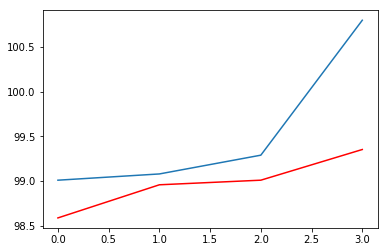

               0
count  10.000000
mean    0.014585
std     0.250508
min    -0.512809
25%    -0.138340
50%     0.091168
75%     0.182405
max     0.307951


In [8]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from matplotlib import pyplot
history = [x for x in train.astype(float)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print(model_fit.summary())
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
residuals = pd.DataFrame(model_fit.resid)
print(residuals.describe())